# Advanced surface characteristics

In this notebook you will learn some more advanced surface characteristics, such as euler characteristics or spherical harmonics expansion. Before running the notebook, make sure you have `pygeodesic` and `napari_stress` installed:

- `pip install pygeodesic`
- `pip install napari_stress`

In [1]:
import vedo
import napari
import numpy as np
from pygeodesic import geodesic
import napari_process_points_and_surfaces as nppas
import napari_stress

In [2]:
mesh = vedo.shapes.Torus(r=50, thickness=10)

In [3]:
viewer = napari.Viewer(ndisplay=3)

In [4]:
viewer.add_surface((mesh.points(), np.asarray(mesh.faces())))
viewer.add_points(mesh.points(), size=0.5)

<Points layer 'Points' at 0x299523c58e0>

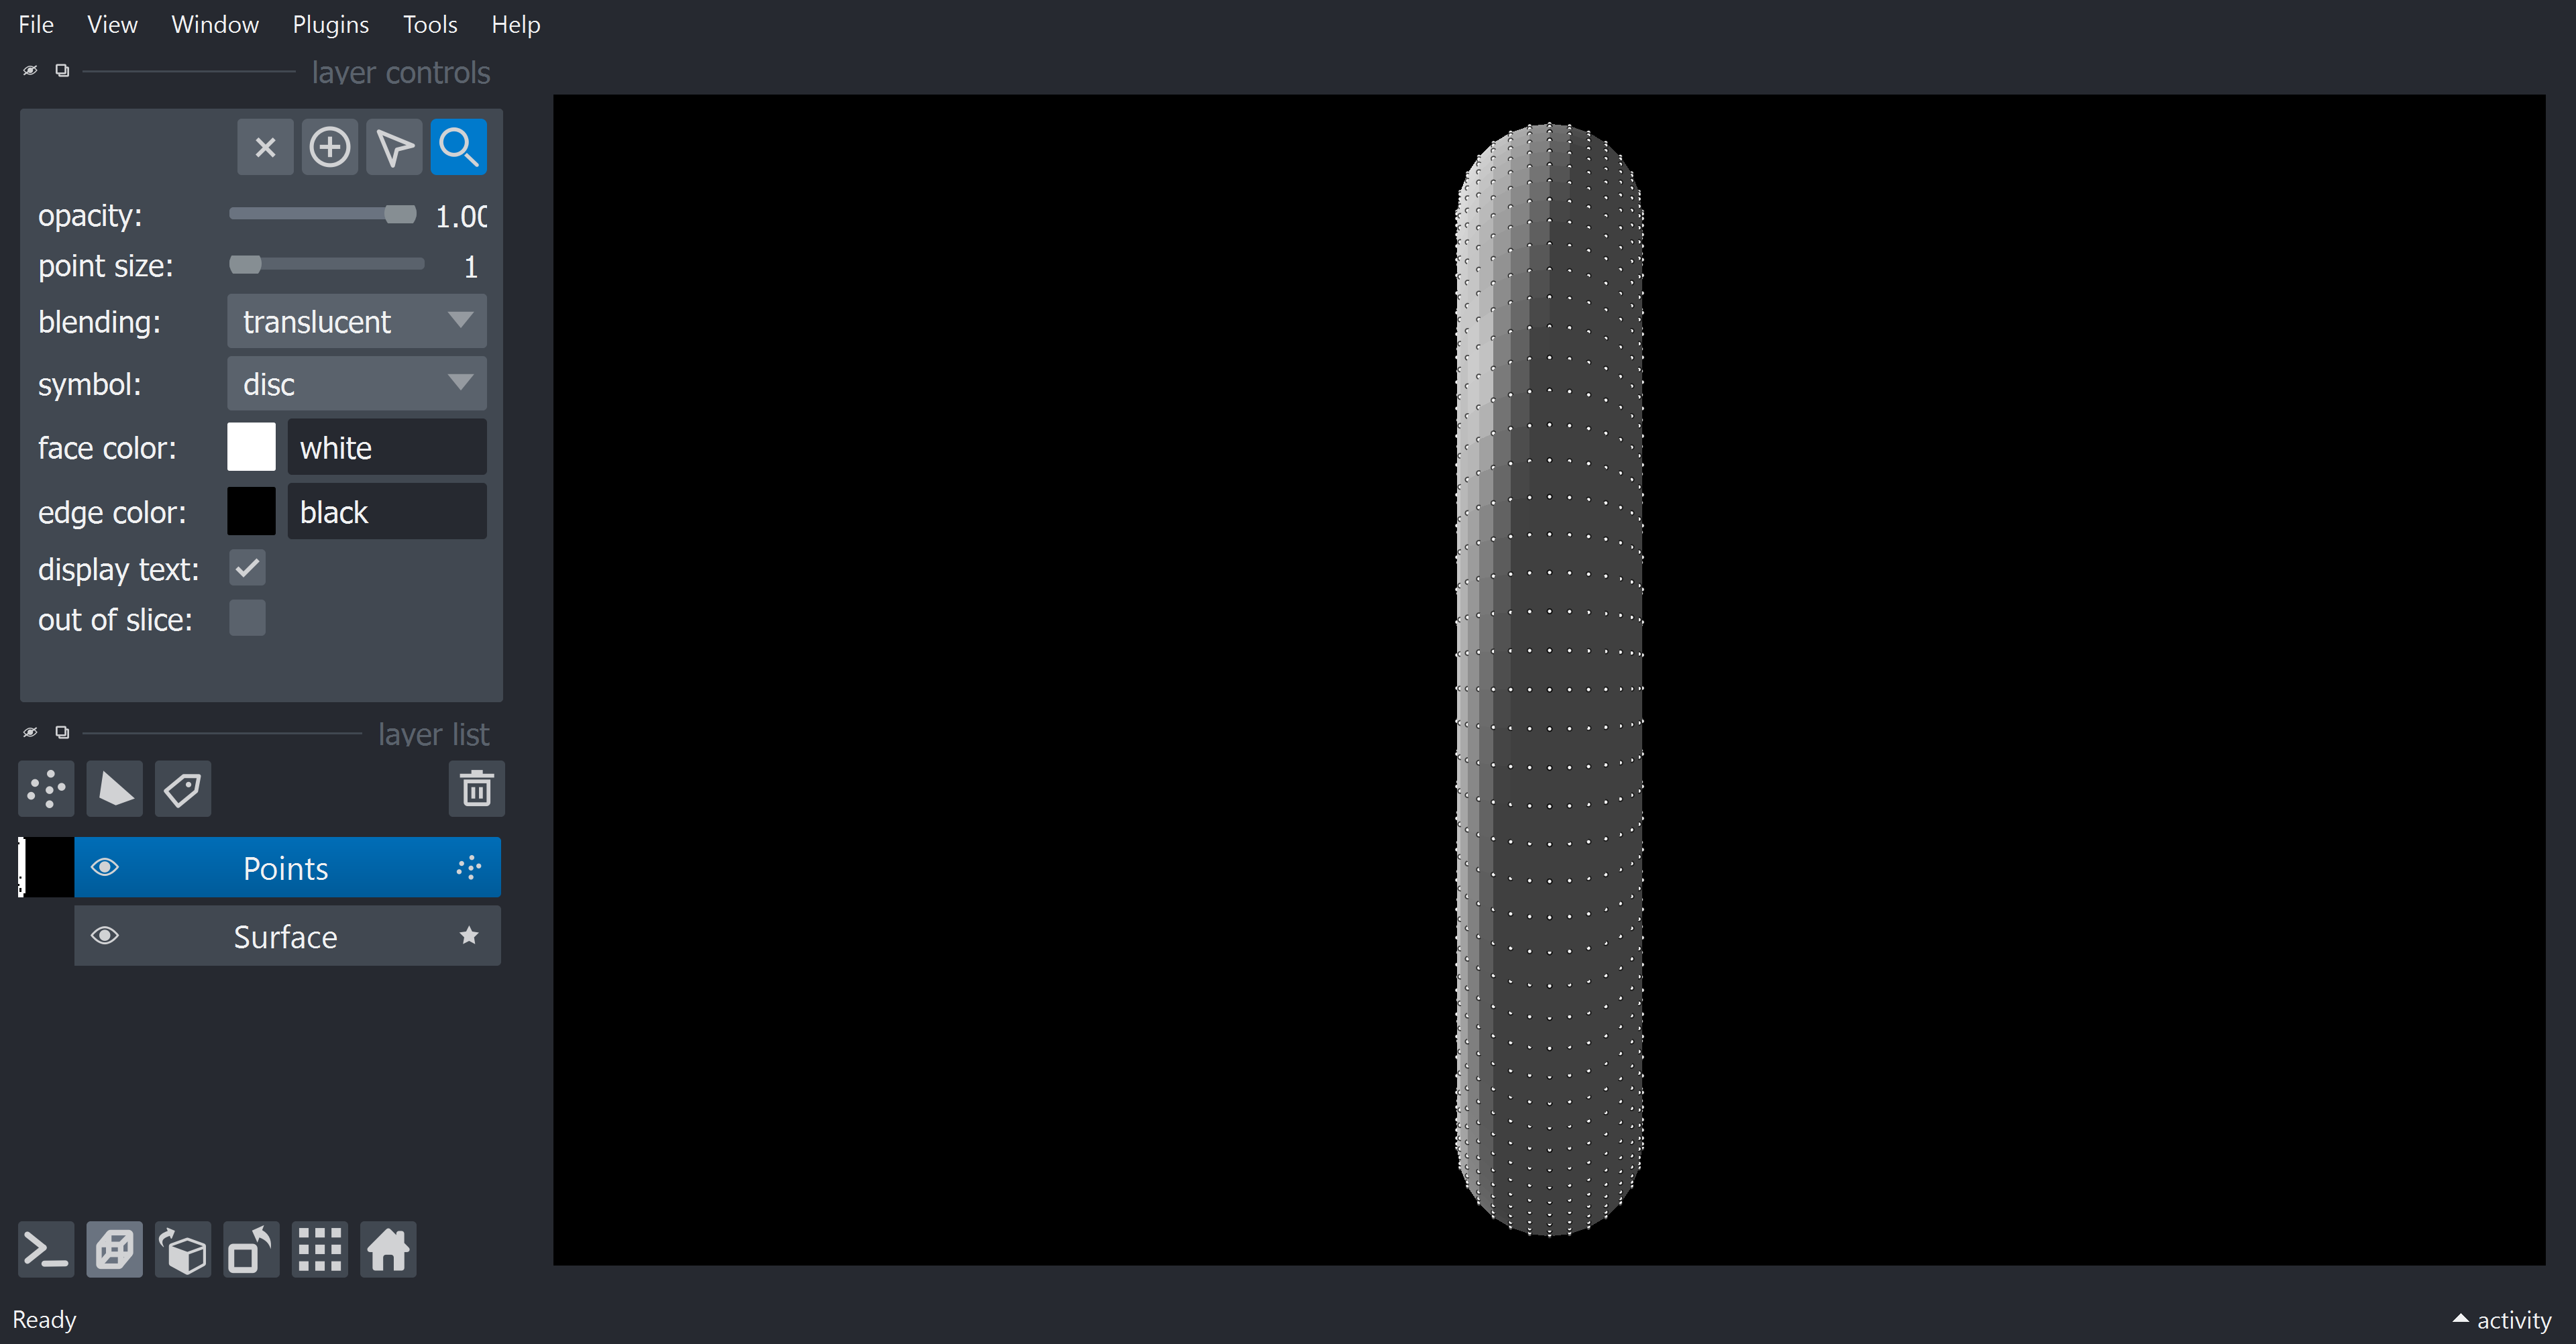

In [5]:
napari.utils.nbscreenshot(viewer)

## Euler characteristic

The [Euler characteristic](https://en.wikipedia.org/wiki/Euler_characteristic) of a mesh allows to identify the topology of the object, e.g. whether it is solid or has holes (and how many). The Euler characteristic $\chi$ is simply defined as follows:

$\chi = V - E + F$

where `V`, `E` and `F` denote the number of points, edges and faces in the mesh. Fo the introduced Torus object, you can do this as follows:

In [6]:
V = len(mesh.points())
E = len(mesh.edges())
F = len(mesh.faces())

In [7]:
chi = V - E + F
chi

-119

If we compare this with what we would expect for a toroidal object, ($\chi = 0$) we see that we actually found a bug in the vedo dataset! Possible reasons are overlapping or intersecting triangles in the mesh. We can try to repair this by fusing points that are close to each other:

In [8]:
surface = nppas.simplify_vertex_clustering((mesh.points(), mesh.faces()), voxel_size=2)
repaired_mesh = vedo.mesh.Mesh((surface[0], surface[1]))

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [9]:
V = len(repaired_mesh.points())
E = len(repaired_mesh.edges())
F = len(repaired_mesh.faces())

In [10]:
chi = V - E + F
chi

0

## Spherical harmonics

Spherical harmonics allow us to take the concept of surfaces one step further - we can decompose an object into more fundamental shapes! We can use `napari_stress.fit_spherical_harmonics` fot his, the relevant parameters being `max_degree` - this controls how many nuances of shape will be captured by the expansion:

In [11]:
viewer2 = napari.Viewer(ndisplay=3)

In [12]:
pointcloud = napari_stress.get_droplet_point_cloud()[0]
viewer2.add_points(pointcloud[0], **pointcloud[1])

<Points layer 'Points' at 0x29954e59a00>

*Note*: This function returns a `LayerDataTuple`, which is structured as `(data, metadata, 'layertype')`

In [13]:
result = napari_stress.fit_spherical_harmonics(pointcloud[0], max_degree=2)

This is the actual data (points, faces & values):

In [ ]:
result[0]

This is the metadata associated with this layer:

In [ ]:
result[1]

This is the type of layer:

In [ ]:
result[2]

In [ ]:
viewer2.add_points(result[0], **result[1])

## Exercise 1:

Try to vary the `max_degree` pparameter - what do you oberve? *Hint*:  You can use the napari-stress `Visualize features` plugin (`Plugins > napari-stress > Visualize features (histogram)`) to show what values are assigned to each point on the surface of the expansion. In the case for the expansion, you can inspect the remaining distance between the input pointcloud and the approximated pointcloud.

In [ ]:
new_result = napari_stress.fit_spherical_harmonics(pointcloud[0], max_degree=)
viewer2.add_points(new_result[0], **new_result[1])

## Exercise 2:

Calculate the euler characteristic for the droplet pointcloud. For this you need to:

- reconstruct the surface from the points. The easiest way to do this is is from the napari viewer (`Tools > Surfaces > Create surface from points (method your choice)`)
- convert it to a vedo object (`vedo_mesh = vedo.mesh.Mesh((points, faces))`)
- count the number of points, edges and faces (`vedo.points()`, `vedo.faces()`, `vedo.edges()`)